In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import typing as tp

### Амплитудно - частотная характеристика

In [2]:
afr = pd.read_csv("afc.csv")
afr

freq  delta_in  delta_out
0   0.1       100     22.174
1   0.2       100     21.467
2   0.5       100     22.758
3   1.0       100     19.369
4   2.0       100     19.046
5   5.0       100     12.428
6  10.0       100      8.230
7  20.0       100      4.681

(0.05, 100.0)

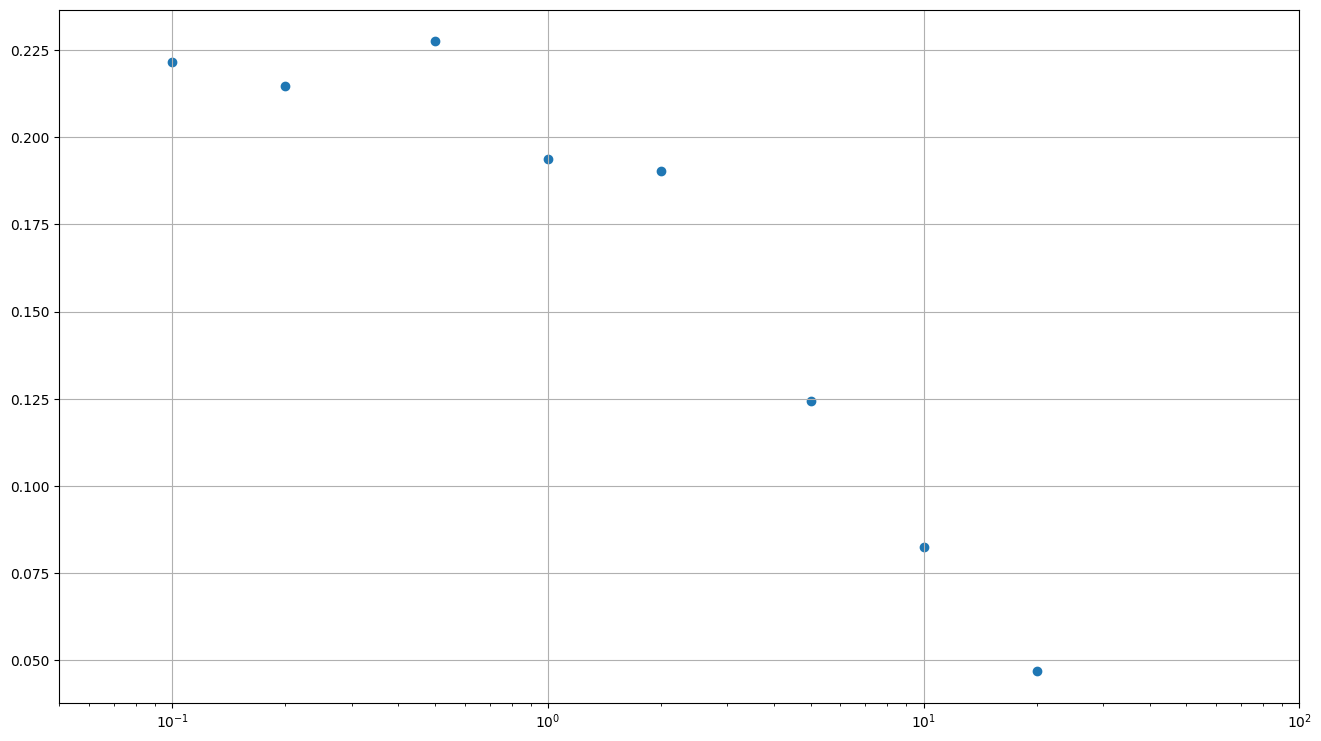

In [10]:
fig, ax = plt.subplots(figsize = (16, 9))


plt.scatter(afr.freq, afr.delta_out / 100)
plt.grid()
plt.xscale('log')
plt.xlim(1e-1 - 0.05, 1e2)

### Лабораторные данные

In [91]:
shifts = [2, 5, 10, 15, 20, 30, 40, 50, 100, 150]
tailSizes = [3000, 3000, 2000, 2000, 1000, 1000, 700, 600, 150, 100]

In [57]:
def getDacAndAdcData(shift: int) -> tuple[np.ndarray, np.ndarray]:
    pathDac = 'raw-data/vah' + str(shift) + 'c2'
    pathAdc = 'raw-data/vah' + str(shift) + 'c1'
    return np.fromfile(pathDac, dtype=np.int32), np.fromfile(pathAdc, dtype=np.int32)

In [102]:
fig, ax = plt.subplots(4, 5, figsize = (32, 18), dpi = 500)

for ind, (shift, tailSize) in enumerate(zip(shifts, tailSizes)):
    dataDac, dataAdc = getDacAndAdcData(shift)
    leftLim = np.where(np.isclose(np.max(dataAdc), dataAdc))[0] - 100 + (ind > 7) * 70
    rightLim = leftLim + tailSize + 100
    ax[2 * (ind > 4), ind % 5].plot(dataDac,
                                    linewidth = shift/150 + 0.3,
                                    color = 'blue')

    ax[2 * (ind > 4) + 1, ind % 5].plot(dataAdc, 
                                        linewidth = shift/150 + 0.3,
                                        color = 'magenta')
    ax[2 * (ind > 4), ind % 5].set_xlim(leftLim, rightLim)
    ax[2 * (ind > 4) + 1, ind % 5].set_xlim(leftLim, rightLim)
    ax[2 * (ind > 4), ind % 5].set_title(f"$s = {shift} \ мв$")

# fig.suptitle("Напряжение на Цап и Ацп при различных значениях сдвига $s$")
fig.tight_layout()
plt.savefig('expData.svg')